<a href="https://colab.research.google.com/github/itsdayo/PyTorch-NeuralNetwork/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np

## **Lists**

In [ ]:
my_list = [1,2,3,4,5, [6,7,8,9,10]]
my_list

[1, 2, 3, 4, 5, [6, 7, 8, 9, 10]]

## **Numpy Array**

In [ ]:
np1 = np.random.rand(3,4)
np1

array([[0.11327272, 0.68093792, 0.04299984, 0.46757706],
       [0.87967049, 0.7381499 , 0.81166748, 0.85457392],
       [0.58896706, 0.07636883, 0.37419125, 0.70330691]])

In [ ]:
np1.dtype

dtype('float64')

In [ ]:
tensor_2d = torch.randn(3,4)
tensor_2d

tensor([[-0.0727,  0.8104, -0.4681,  0.5643],
        [-0.2769, -0.0404, -1.9552,  1.8231],
        [ 0.1744,  0.4879,  0.0062, -0.0565]])

In [ ]:
tensor_3d = torch.zeros(2,3,4)
tensor_3d

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Reshape and View
my_torch = my_torch.reshape(2,5)
my_torch

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
# Reshape if we dont know the number of items

my_torch2 = torch.arange(15)
my_torch2
my_torch2 = my_torch2.reshape(3,-1)
my_torch2

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]])

In [ ]:
# Using view instead of reshape
my_torch3 = torch.arange(10)
my_torch4 = my_torch3.view(2,5)
my_torch4

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

## **Math**

In [ ]:
tensor_a = torch.tensor([1,2,3,4])
tensor_b = torch.tensor([5,6,7,8])

#Addition
tensor_a + tensor_b

tensor([ 6,  8, 10, 12])

In [ ]:
#Addtion long hand
torch.add(tensor_a,tensor_b)

tensor([ 6,  8, 10, 12])

In [ ]:
#Subtraction
tensor_b -tensor_a


tensor([4, 4, 4, 4])

In [ ]:
#Sub function
torch.sub(tensor_b,tensor_a)

tensor([4, 4, 4, 4])

In [ ]:
#Division

tensor_b / tensor_a

tensor([5.0000, 3.0000, 2.3333, 2.0000])

In [ ]:
# Div long hand
torch.div(tensor_b,tensor_a)

tensor([5.0000, 3.0000, 2.3333, 2.0000])

In [ ]:
#Remainder
tensor_b % tensor_a

tensor([0, 0, 1, 0])

## **Neural Network**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F



In [ ]:
class Model(nn.Module):
  # Input layer (4 features of the flower) --->
  # Hidden Layer 1 (number of neurons)---->
  # H2(n)--->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=7, h2=9, out_features=3):
    super().__init__()
    #fc = fully connected
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2, out_features)
  def forward(self, x):
    #relu rectify linear unit if <0 = 0 , >0 use original number
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [ ]:
# Pick a random seed for randomization

torch.manual_seed(32)
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# change last columns from string to ints
my_df['species'] = my_df["species"].replace('setosa',0.0)
my_df['species'] = my_df["species"].replace('virginica',2.0)
my_df['species'] = my_df["species"].replace('versicolor',1.0)


In [ ]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
#Train test and split

X = my_df.drop("species", axis=1)
y = my_df["species"]

In [ ]:
X


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=41)

In [ ]:
X_train = torch.Tensor(X_train.values)
X_test = torch.Tensor(X_test.values)
y_train = torch.LongTensor(y_train)
Y_test = torch.LongTensor(Y_test.values)

In [ ]:
# Set the criterion of model to measure the error, how far off the
# predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose data Optimizerm, lr = learning rate
# ( if error doesn't go down after a bunch of iterations (epochs)
# lower our learing rate)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [ ]:
# Train our model
# Epochs (one run thru all the training data in our network)
epochs = 200
losses =[]
for i in range(epochs):
  # Go Forward and get a prediction
  y_pred = model.forward(X_train) # get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  # print every 10 epochs

  if i % 10 == 0:
    print(f'Epoch {i} and loss {loss}')

    # Do some back propagation: take the error rate of forward propagation
    # and feed it back thru the network to fine tune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 and loss 1.126037836074829
Epoch 10 and loss 1.1016725301742554
Epoch 20 and loss 1.095431923866272
Epoch 30 and loss 1.0929419994354248
Epoch 40 and loss 1.089834213256836
Epoch 50 and loss 1.0858681201934814
Epoch 60 and loss 1.080834984779358
Epoch 70 and loss 1.0745956897735596
Epoch 80 and loss 1.0670548677444458
Epoch 90 and loss 1.0581512451171875
Epoch 100 and loss 1.0478456020355225
Epoch 110 and loss 1.036095142364502
Epoch 120 and loss 1.022822618484497
Epoch 130 and loss 1.0079433917999268
Epoch 140 and loss 0.9913169145584106
Epoch 150 and loss 0.9728041887283325
Epoch 160 and loss 0.952380895614624
Epoch 170 and loss 0.9301126599311829
Epoch 180 and loss 0.9060688018798828
Epoch 190 and loss 0.8805865049362183


Text(0.5, 0, 'Epoch')

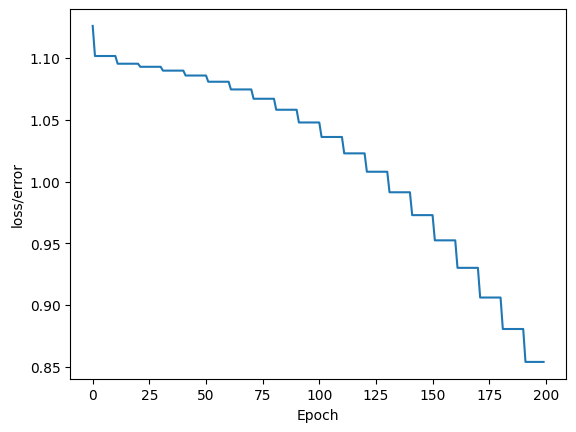

In [ ]:
# Graph it out

plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel ("Epoch")

In [ ]:
# Evaluate Model on Test Data set (validate model on test set)

with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, Y_test)

loss

tensor(0.8884)

In [ ]:
correct = 0

with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)


    print (f'{i+1},) {str(y_val)} \t {Y_test[i]}')

    # Correct or not

    if (y_val.argmax().item()== Y_test[i]):
      correct +=1
print(f'We got {correct} Correct')



1,) tensor([0.0501, 0.6658, 0.7652]) 	 2
2,) tensor([0.0327, 0.6974, 0.8210]) 	 2
3,) tensor([-0.0010,  0.7586,  0.9289]) 	 2
4,) tensor([0.1343, 0.5739, 0.6221]) 	 1
5,) tensor([0.0379, 0.6880, 0.8044]) 	 2
6,) tensor([0.1561, 0.5478, 0.5804]) 	 1
7,) tensor([0.0608, 0.6463, 0.7308]) 	 2
8,) tensor([0.2106, 0.5352, 0.5849]) 	 1
9,) tensor([0.0550, 0.6569, 0.7497]) 	 2
10,) tensor([0.0278, 0.7062, 0.8366]) 	 2
11,) tensor([0.0764, 0.6180, 0.6809]) 	 2
12,) tensor([0.8199, 0.1874, 0.2066]) 	 0
13,) tensor([0.7525, 0.1970, 0.1885]) 	 0
14,) tensor([0.1894, 0.4973, 0.4943]) 	 1
15,) tensor([0.7089, 0.2373, 0.2475]) 	 0
16,) tensor([0.0671, 0.6349, 0.7108]) 	 2
17,) tensor([0.7408, 0.2187, 0.2268]) 	 0
18,) tensor([0.0648, 0.6390, 0.7180]) 	 1
19,) tensor([0.7682, 0.2068, 0.2176]) 	 0
20,) tensor([0.5407, 0.2881, 0.2582]) 	 0
21,) tensor([0.1627, 0.5289, 0.5447]) 	 1
22,) tensor([0.0326, 0.6975, 0.8213]) 	 2
23,) tensor([0.7533, 0.2130, 0.2221]) 	 0
24,) tensor([0.7981, 0.1839, 0.1870]) 	 

## **New Data into Model**

In [ ]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [ ]:
with torch.no_grad():
  print(model(new_iris))

tensor([0.7981, 0.1839, 0.1870])


In [ ]:
newer_iris = torch.tensor([5.9,3.0,5.1,1.8])
with torch.no_grad():
  print(model(newer_iris))


tensor([0.0732, 0.6238, 0.6912])


In [ ]:
# Save our NN Model

torch.save(model.state_dict(),"iris_model.pt")

In [ ]:
# Load the save model

new_model = Model()
new_model.load_state_dict(torch.load("iris_model.pt"))

<All keys matched successfully>

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=7, bias=True)
  (fc2): Linear(in_features=7, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)